<a href="https://colab.research.google.com/github/gilangarisptr/Ensemble-learning/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

**Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model**. To better understand this definition lets take a step back into ultimate goal of machine learning and model building. This is going to make more sense as I dive into specific examples and why Ensemble methods are used. in which we will be dealing with different ensemble learning techniques such as the following:
* Averaging
* Weighted Averaging
* Max Voting
* Bagging
* Boosting
* Blending

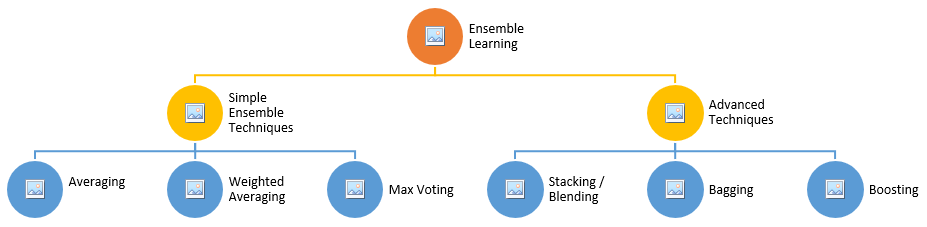


## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter15/Dataset/crx.data'
df = pd.read_csv(data,sep=',',header=None, na_values='?')

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Preporcessing Data

In [3]:
df.loc[df[15]=="+", 15] = 1
df.loc[df[15]=="-", 15] = 0

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [5]:
df.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [6]:
df_clean = df.dropna(axis=0)

In [7]:
df_clean.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [8]:
df_clean.shape

(653, 16)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    object 
 1   1       653 non-null    float64
 2   2       653 non-null    float64
 3   3       653 non-null    object 
 4   4       653 non-null    object 
 5   5       653 non-null    object 
 6   6       653 non-null    object 
 7   7       653 non-null    float64
 8   8       653 non-null    object 
 9   9       653 non-null    object 
 10  10      653 non-null    int64  
 11  11      653 non-null    object 
 12  12      653 non-null    object 
 13  13      653 non-null    float64
 14  14      653 non-null    int64  
 15  15      653 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


In [12]:
df_cat = pd.get_dummies(df_clean[[0,3,4,5,6,8,9,11,12]])

df_num = df_clean[[1,2,7,10,13,14]]

In [13]:
X = pd.concat([df_cat, df_num], axis=1)

y = df_clean[15]

In [14]:
X.shape

(653, 46)

In [16]:
y.shape

(653,)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data = pd.DataFrame(scaler.fit_transform(X))
X_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,-0.255446,-0.203635,-0.195335,-0.287956,-0.303271,-0.124708,-0.281672,-0.248573,-0.360219,-0.067937,3.060242,-0.241551,-0.297209,-0.096299,-0.30025,-0.515271,-0.111369,-0.078507,-0.055427,0.844932,-0.111369,-0.933306,0.933306,-1.129275,1.129275,0.927577,-0.927577,0.303271,-0.055427,-0.297209,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125
1,1.488875,-1.488875,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,-0.255446,-0.203635,-0.195335,-0.287956,-0.303271,-0.124708,-0.281672,-0.248573,2.776088,-0.067937,-0.326772,-0.241551,-0.297209,-0.096299,-0.30025,1.940728,-0.111369,-0.078507,-0.055427,-1.183527,-0.111369,-0.933306,0.933306,-1.129275,1.129275,0.927577,-0.927577,0.303271,-0.055427,-0.297209,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443
2,1.488875,-1.488875,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,-0.255446,-0.203635,-0.195335,-0.287956,-0.303271,-0.124708,-0.281672,-0.248573,2.776088,-0.067937,-0.326772,-0.241551,-0.297209,-0.096299,-0.30025,1.940728,-0.111369,-0.078507,-0.055427,-1.183527,-0.111369,-0.933306,0.933306,0.885524,-0.885524,0.927577,-0.927577,0.303271,-0.055427,-0.297209,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150
3,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,-0.255446,-0.203635,-0.195335,-0.287956,-0.303271,-0.124708,-0.281672,-0.248573,-0.360219,-0.067937,3.060242,-0.241551,-0.297209,-0.096299,-0.30025,-0.515271,-0.111369,-0.078507,-0.055427,0.844932,-0.111369,-0.933306,0.933306,-1.129275,1.129275,-1.078078,1.078078,0.303271,-0.055427,-0.297209,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553
4,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,-0.255446,-0.203635,-0.195335,-0.287956,-0.303271,-0.124708,-0.281672,-0.248573,-0.360219,-0.067937,3.060242,-0.241551,-0.297209,-0.096299,-0.30025,-0.515271,-0.111369,-0.078507,-0.055427,0.844932,-0.111369,-0.933306,0.933306,0.885524,-0.885524,0.927577,-0.927577,-3.297382,-0.055427,3.364633,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125


In [27]:
y = y.astype('int')

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data,y, test_size=0.3, random_state=42)

In [29]:
y_train.head()

513    1
142    1
325    0
555    1
567    1
Name: 15, dtype: int64

In [30]:
x_train.shape

(457, 46)

## Modeling Data

In [31]:
from sklearn.linear_model import LogisticRegression
# define logistic regression

Modellr = LogisticRegression()
Modellr.fit(x_train, y_train)
#fitting model



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred = Modellr.predict(x_test)

In [33]:
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [34]:
Modellr.score(x_test,y_test)

0.8520408163265306

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Confusion Matrix for the model
print(confusion_matrix(y_test, pred))
# Classification report for the model
print(classification_report(y_test, pred))

[[91 19]
 [10 76]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       110
           1       0.80      0.88      0.84        86

    accuracy                           0.85       196
   macro avg       0.85      0.86      0.85       196
weighted avg       0.86      0.85      0.85       196



## Ensemble Technique

### Averaging

Averaging is a naïve way of doing ensemble learning; however, it is extremely useful too. The basic idea behind this technique is to take the predictions of multiple individual models and then average the predictions to generate a final prediction. The assumption is that by averaging the predictions of different individual learners, we eliminate the errors made by individual learners, thereby generating a model superior to the base model. One prerequisite to make averaging work is to have the predictions of the base models be uncorrelated. This would mean that the individual models should not make the same kinds of errors. The diversity of the models is a critical aspect to ensure uncorrelated errors.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
model1 = LogisticRegression(random_state=123)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = RandomForestClassifier(n_estimators=500)

In [37]:
# Fitting all three models on the training data
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
"""
Predicting probabilities of each model 
on the test set
"""
pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

In [41]:
avg_ensemble = (pred1 + pred2 + pred3)/3

In [42]:
# Printing the order of classes for each model
print(model1.classes_)
print(model2.classes_)
print(model3.classes_)

[0 1]
[0 1]
[0 1]


In [44]:
import numpy as np
pred = np.argmax(avg_ensemble,axis = 1)
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [45]:
#generating confusion matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[92 18]
 [ 9 77]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       110
           1       0.81      0.90      0.85        86

    accuracy                           0.86       196
   macro avg       0.86      0.87      0.86       196
weighted avg       0.87      0.86      0.86       196



after used averaging ensembling our recall and f-1 score incresead. WOW! it's amazing right? but our f1-score and recall is still under 90%, especially for 0 recall we just got 84%. hmm... we must incresead that number

### Weighted Averaging

Weighted averaging is an extension of the averaging method that we saw earlier. The major difference in both of these approaches is in the way the combined predictions are generated. In the weighted averaging method, we assign weights to each model's predictions and then generate the combined predictions. The weights are assigned based on our judgment of which model would be the most influential in the ensemble. These weights, which are initially assigned arbitrarily, have to be evolved after a lot of experimentation. To start off, we assume some weights and then iterate with different weights for each model to verify whether we get any improvements in the performance.

In [47]:
"""
Calculating the ensemble prediction by applying 
weights for each prediction
"""
ensemblepred=(pred1 *0.60 + pred2 * 0.20 + pred3 * 0.20)

pred = np.argmax(ensemblepred, axis=1)

#print(score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[93 17]
 [ 7 79]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       110
           1       0.82      0.92      0.87        86

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



### Max Voting

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
# Defining the ensemble model using VotingClassifier
model = VotingClassifier(estimators=[('lr', model1),\
                        ('knn', model2),('rf', model3)],\
                         voting= 'hard')

model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

In [51]:
model.score(x_test,y_test)

0.8673469387755102

In [52]:
pred = model.predict(x_test)

print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[93 17]
 [ 9 77]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.82      0.90      0.86        86

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



### Bagging (Boosting Aggregating)

Bagging is a pseudonym for Bootstrap Aggregating. Before we explain how bagging works, let's describe what bootstrapping is. Bootstrapping has its etymological origins in the phrase, Pulling oneself up by one's bootstrap. The essence of this phrase is to make the best use of the available resources. In the statistical context, bootstrapping entails taking samples from the available dataset by replacement. Let's look at this concept with a toy example.

Suppose we have a dataset consisting of 10 numbers from 1 to 10. We now need to create 4 different datasets of 10 each from the available dataset. How do we do this? This is where the concept of bootstrapping comes in handy. In this method, we take samples from the available dataset one by one and then replace the number we took before taking the next sample. We continue with this until we get a sample with the number of data points we need. As we are replacing each number after it is selected, there is a chance that we might have more than one of a given data point in a sample

When implementing bagging, we use a function called BaggingClassifier(), which is available in the Scikit learn library. Some of the important arguments that are provided when creating an ensemble model include the following:

* base_estimator: This argument is to define the base estimator to be used.
* n_estimator: This argument defines the number of base estimators that will be used in the ensemble.
* max_samples: The maximum size of the bootstrapped sample for fitting the base estimator is defined using this argument. This is represented as a proportion (0.8, 0.7, and so on).
* max_features: When fitting multiple individual learners, it has been found that randomly selecting the features to be used in each dataset results in superior performance. The max_features argument indicates the number of features to be used. For example, if there were 10 features in the dataset and the max_features argument was to be defined as 0.8, then only 8 (0.8 x 10) features would be used to fit a model using the base learner.

In [53]:
# Defining the base learner
from sklearn.ensemble import RandomForestClassifier
bl1 = RandomForestClassifier(random_state=123)

In [58]:
# Creating the bagging meta learner
from sklearn.ensemble import BaggingClassifier

baggingLearner = BaggingClassifier(base_estimator=bl1, n_estimators=10, max_samples=0.9, max_features=0.9)

In [59]:
model = baggingLearner.fit(x_train, y_train)

In [60]:
# Predicting on the test set using the model
pred = model.predict(x_test)

In [61]:
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[94 16]
 [12 74]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.82      0.86      0.84        86

    accuracy                           0.86       196
   macro avg       0.85      0.86      0.86       196
weighted avg       0.86      0.86      0.86       196



### Boosting

The bagging technique, which we discussed in the last section, can be termed as a parallel learning technique. This means that each base learner is fit independently of the other and their predictions are aggregated. Unlike the bagging method, boosting works in a sequential manner. It works on the principle of correcting the prediction errors of each base learner. The base learners are fit sequentially one after the other. A base learner tries to correct the error generated by the previous learner and this process continues until a superior meta learner is created. The steps involved in the boosting technique are as follows:

1. A base learner is fit on a subset of the dataset.
2. Once the model is fit, predictions are made on the entire dataset.
3. The errors in the predictions are identified by comparing them with the actual labels.
4. Those examples that generated the wrong predictions are given larger weights.
5. Another base learner is fit on the dataset where the weights of the wrongly predicted examples in the previous step are altered.
6. This base learner tries to correct the errors of the earlier model and gives their predictions.
Steps 4, 5, and 6 are repeated until a strong meta learner is generated

In [62]:
# Defining the base learner
from sklearn.ensemble import RandomForestClassifier
bl1 = RandomForestClassifier(random_state=123)
# Defining the boosting meta learner
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier(base_estimator=bl1, \
                              n_estimators=300)
# Fitting the model on the training set
model = boosting.fit(x_train, y_train)
# Getting the predictions from the boosting model
pred = model.predict(x_test)
# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))
# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[96 14]
 [13 73]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.84      0.85      0.84        86

    accuracy                           0.86       196
   macro avg       0.86      0.86      0.86       196
weighted avg       0.86      0.86      0.86       196



### Stacking

Stacking: Define the base learners and meta learner, create the stacking classifier, fit the model, generate the predictions, and print the confusion matrix and classification report:

In [64]:
# Importing the meta learner and base learners
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
bl1 = KNeighborsClassifier(n_neighbors=5)
bl2 = LogisticRegression(random_state=123) 
ml = RandomForestClassifier(random_state=123)
# Creating the stacking classifier
from mlxtend.classifier import StackingClassifier
stackclf = StackingClassifier(classifiers=[bl1, bl2], \
                              meta_classifier=ml)
# Fitting the model on the training set
model = stackclf.fit(x_train, y_train)
# Generating predictions on test set
pred = model.predict(x_test)
# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))
# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[91 19]
 [10 76]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       110
           1       0.80      0.88      0.84        86

    accuracy                           0.85       196
   macro avg       0.85      0.86      0.85       196
weighted avg       0.86      0.85      0.85       196

